In [39]:
import torch
import torch.nn.functional as F
import utils
from importlib import reload
reload(utils)

<module 'utils' from '/home/amitaharoni/workspace/cv-sprint/models/utils.py'>

In [41]:
train_dl, valid_dl, test_dl, class_names = utils.make_dataloaders()

Files already downloaded and verified
Files already downloaded and verified


tulip


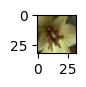

In [49]:
import matplotlib.pyplot as plt

img, label = next(iter(test_dl))
id = 5
img = img[id].numpy().transpose([1,2,0])
fig, ax = plt.subplots(figsize=(0.5,0.5))
ax.imshow(img)
print(class_names[label[id]])
display()

In [3]:
class TestNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.backbone = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3),
            torch.nn.ReLU(),
            torch.nn.AdaptiveAvgPool2d(output_size=1),
        )
        self.head = torch.nn.Linear(in_features=16, out_features=100)

    def forward(self, x: torch.Tensor):
        x = self.backbone(x)
        x = x.view(-1, 16)
        x = self.head(x)
        return x
    
model = TestNetwork().to(utils.device)

In [4]:
model

TestNetwork(
  (backbone): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): AdaptiveAvgPool2d(output_size=1)
  )
  (head): Linear(in_features=16, out_features=100, bias=True)
)

In [23]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
utils.train_model(model, train_dl, valid_dl, loss_fn, optimizer, tensorboard_dir='../runs/00_silly', metrics=[utils.metric_accuracy])

100%|██████████| 157/157 [00:00<00:00, 195.27it/s]


Epoch 1/10: train_loss=4.1003, train_accuracy=0.0770, val_loss=4.1009, val_accuracy=0.0826
loss train
accuracy train
loss val
accuracy val


100%|██████████| 157/157 [00:00<00:00, 175.27it/s]


Epoch 2/10: train_loss=4.0874, train_accuracy=0.0779, val_loss=4.0931, val_accuracy=0.0838
loss train
accuracy train
loss val
accuracy val


100%|██████████| 157/157 [00:00<00:00, 204.40it/s]


Epoch 3/10: train_loss=4.0755, train_accuracy=0.0818, val_loss=4.0774, val_accuracy=0.0926
loss train
accuracy train
loss val
accuracy val


100%|██████████| 157/157 [00:00<00:00, 186.41it/s]


Epoch 4/10: train_loss=4.0642, train_accuracy=0.0830, val_loss=4.0730, val_accuracy=0.0868
loss train
accuracy train
loss val
accuracy val


100%|██████████| 157/157 [00:00<00:00, 253.28it/s]


Epoch 5/10: train_loss=4.0542, train_accuracy=0.0841, val_loss=4.0658, val_accuracy=0.0888
loss train
accuracy train
loss val
accuracy val


100%|██████████| 157/157 [00:00<00:00, 185.13it/s]


Epoch 6/10: train_loss=4.0440, train_accuracy=0.0861, val_loss=4.0570, val_accuracy=0.0856
loss train
accuracy train
loss val
accuracy val


100%|██████████| 157/157 [00:00<00:00, 201.52it/s]


Epoch 7/10: train_loss=4.0365, train_accuracy=0.0874, val_loss=4.0501, val_accuracy=0.0916
loss train
accuracy train
loss val
accuracy val


100%|██████████| 157/157 [00:00<00:00, 185.76it/s]


Epoch 8/10: train_loss=4.0285, train_accuracy=0.0880, val_loss=4.0397, val_accuracy=0.0912
loss train
accuracy train
loss val
accuracy val


100%|██████████| 157/157 [00:00<00:00, 261.59it/s]


Epoch 9/10: train_loss=4.0209, train_accuracy=0.0891, val_loss=4.0362, val_accuracy=0.0936
loss train
accuracy train
loss val
accuracy val


100%|██████████| 157/157 [00:00<00:00, 201.81it/s]

Epoch 10/10: train_loss=4.0151, train_accuracy=0.0888, val_loss=4.0321, val_accuracy=0.0950
loss train
accuracy train
loss val
accuracy val


TestNetwork(
  (backbone): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): AdaptiveAvgPool2d(output_size=1)
  )
  (head): Linear(in_features=16, out_features=100, bias=True)
)

In [24]:
utils.evaluate_model(model, test_dl, loss_fn, metrics=[utils.metric_accuracy])

{'loss': 4.024030772018433, 'accuracy': 0.0923}